In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import pyinputplus as pyip
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn import metrics
from ipywidgets import Layout

<h2>Reading the data and getting familiar with it</h2>

In [2]:
# Read csv into a dataframe
df = pd.read_csv("mushrooms.csv")
print(df.shape)
df.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Check for NULL values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
# View the different categories
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

<h5>There are two classifications of mushrooms we are focusing on. Poisonous and Edible</h5>

In [5]:
df['class'] = df['class'].replace(['e', 'p'], ['edible', 'poisonous'])

edible       4208
poisonous    3916
Name: class, dtype: int64


<AxesSubplot:ylabel='class'>

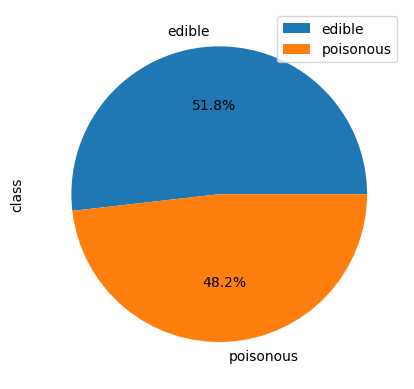

In [6]:
# Get counts of poisonous and edible fungi and display as pie chart
print(df["class"].value_counts())
df["class"].value_counts().plot(kind = "pie", legend = True, autopct='%1.1f%%')

<h5>Our data is loosely balanced between poisonous and edible</h5>

In [7]:
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

<h2>Using a heatmap to visualize the correlations between each category</h2>

In [8]:
# Encoding categories so that we can better see correlations
labelencoder = LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

<AxesSubplot:>

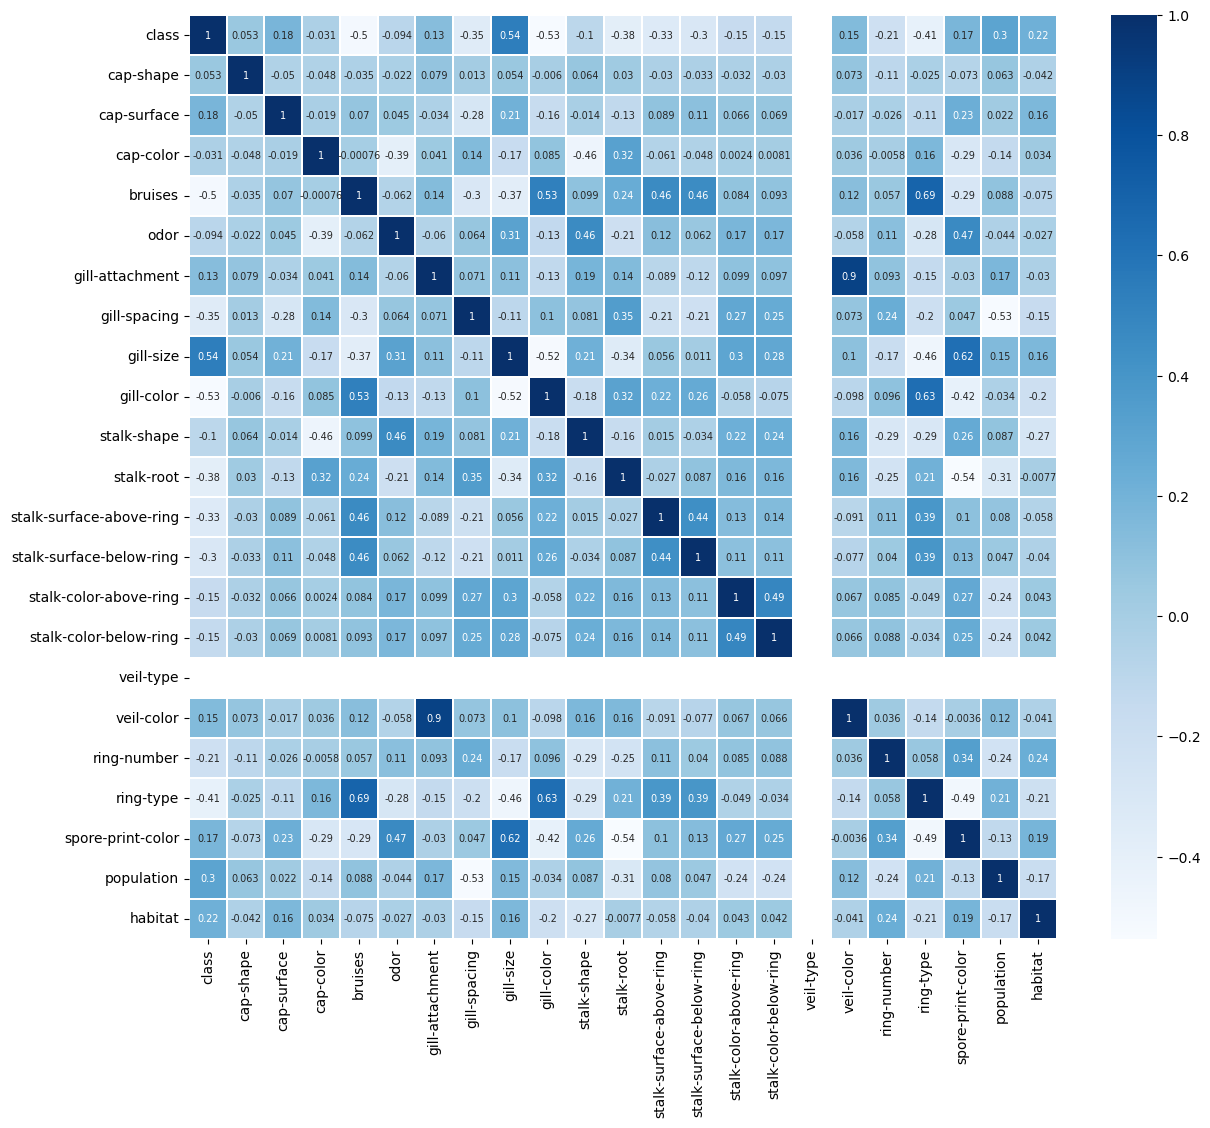

In [9]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), linewidths = .1, annot = True, annot_kws = {"size": 7}, cmap = "Blues")


<h4>The veil-type category is always the same so we can remove it from the data</h4>

In [10]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [11]:
df = df.drop(['veil-type'], axis = 1)

<AxesSubplot:>

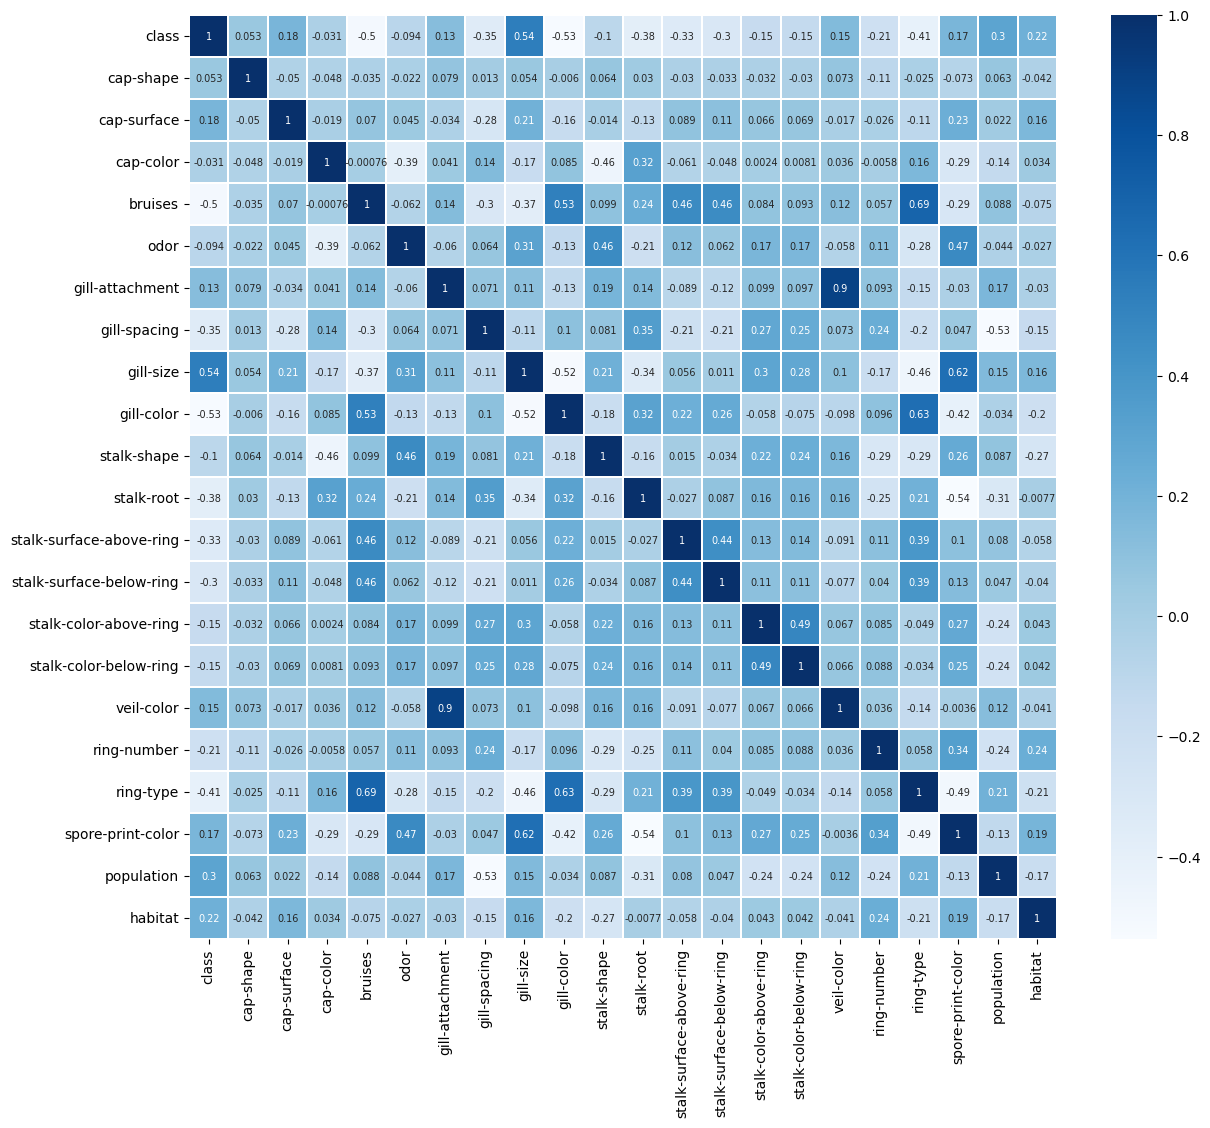

In [12]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), linewidths = .1, annot = True, annot_kws = {"size": 7}, cmap = "Blues")

<h2>Using a Support Vector Machine we are able to obtain a 100% accuracy using the test data</h2>

In [32]:
X = df.drop(['class'], axis = 1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
pd.set_option('display.max_columns', None)
X_train.head(20)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3887,5,2,8,0,1,1,0,1,5,0,1,2,2,7,7,2,1,4,3,3,0
4119,2,0,9,0,2,1,0,0,3,0,1,1,1,4,0,2,1,2,1,4,1
1600,5,3,3,1,5,1,0,0,5,1,1,2,2,6,3,2,1,4,2,5,0
4988,5,3,9,0,2,1,0,0,7,0,1,1,1,4,4,2,1,2,1,5,4
6757,2,3,4,0,2,1,0,1,0,1,0,2,1,7,6,2,1,0,7,4,0
3128,2,0,2,1,5,1,0,0,10,1,1,2,2,6,3,2,1,4,3,4,0
5891,5,3,4,0,2,1,0,1,0,1,0,2,2,7,6,2,1,0,7,4,4
6838,5,2,4,0,2,1,0,1,0,1,0,1,2,7,6,2,1,0,7,4,4
4617,2,3,3,0,2,1,0,0,7,0,1,1,1,6,0,2,1,2,1,5,0
3761,2,0,3,1,5,1,0,0,9,1,1,2,2,6,7,2,1,4,3,4,0


In [25]:
y_train.head(20)

3887    1
4119    1
1600    0
4988    1
6757    1
3128    0
5891    1
6838    1
4617    1
3761    0
7854    0
1298    0
426     0
2112    1
805     0
5865    0
410     0
6787    1
8060    1
5813    1
Name: class, dtype: int32

In [15]:
model = SVC(random_state=42, gamma="auto", kernel='linear')
model.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', random_state=42)

In [16]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Test Accuracy: {} %".format(round(model.score(X_test, y_test)*100, 2)))
print("Precision:",metrics.precision_score(y_test, y_pred)*100,'%')
print("Recall:",metrics.recall_score(y_test, y_pred)*100,'%')

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1040
           1       0.95      0.96      0.96       991

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031

Test Accuracy: 95.96 %
Precision: 95.4045954045954 %
Recall: 96.3673057517659 %


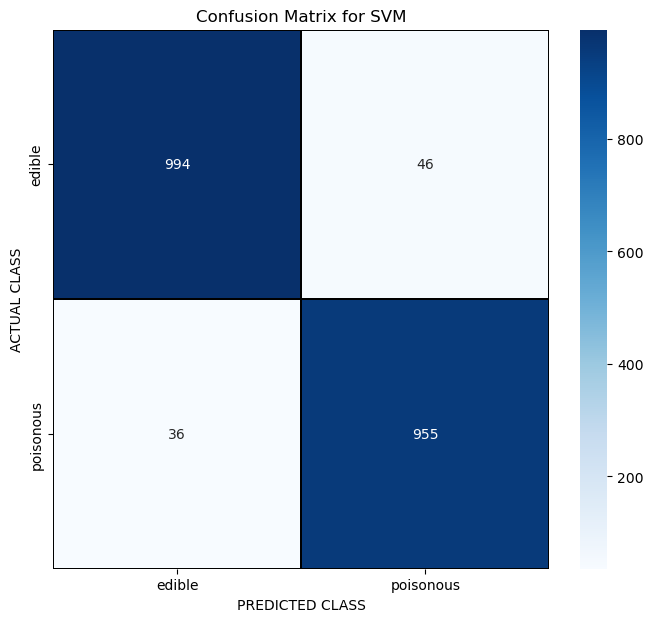

In [17]:
c_matrix = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize = (8, 7))
sns.heatmap(c_matrix, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels = ["edible", "poisonous"], yticklabels = ["edible", "poisonous"])
plt.xlabel("PREDICTED CLASS")
plt.ylabel("ACTUAL CLASS")
plt.title('Confusion Matrix for SVM')
plt.show()

<h2>Performing Principal Component Analysis to visual the data variances</h2>

In [18]:
pca = PCA()
pca.fit_transform(X)

array([[ 2.28206623e-01, -3.45472088e-01, -1.42442514e+00, ...,
        -2.37783370e-01, -4.77328626e-03,  1.59389715e-02],
       [-1.93656097e+00,  4.79691211e+00, -3.51166784e+00, ...,
         5.51886027e-02, -8.26328489e-02, -2.67620525e-02],
       [-1.65417317e+00,  2.46436226e+00, -3.88082715e+00, ...,
         1.54630979e-01, -1.71537564e-01, -5.40422856e-02],
       ...,
       [-1.86050705e+00,  4.70243677e-01,  1.19021189e+00, ...,
        -9.82953462e-02,  3.69160360e-02,  3.15711395e-01],
       [ 7.29306843e+00, -1.25169255e+00, -1.24197629e+00, ...,
         1.13045514e-01, -3.63539333e-02, -1.08423374e-02],
       [-4.83553281e+00, -3.58375805e+00, -1.12506072e-01, ...,
         1.40627807e-01,  7.09579221e-03,  2.53977985e-01]])

In [19]:
covariance=pca.get_covariance()
explained_variance=pca.explained_variance_
explained_variance

array([1.72828277e+01, 8.48871503e+00, 6.28974232e+00, 3.47953374e+00,
       2.98527691e+00, 2.60713181e+00, 2.39124297e+00, 2.00091850e+00,
       1.83169875e+00, 1.32677967e+00, 1.02156481e+00, 5.27071267e-01,
       2.83872928e-01, 2.17155377e-01, 1.76639347e-01, 1.04458335e-01,
       7.74242776e-02, 6.37264064e-02, 2.50755888e-02, 1.14926271e-02,
       2.78262286e-03])

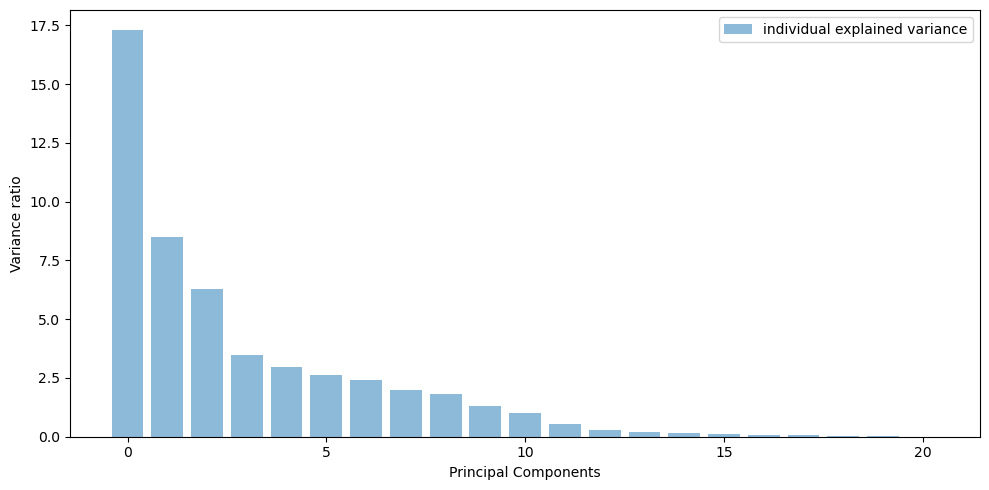

In [20]:
# Plotting the variance of each component
plt.figure(figsize=(10, 5))    
plt.bar(range(21), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Variance ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()

<h5>The first four components to the left have the most amount of variance and accounts for about 70% of the weight<br>
The next eight contain an additional 20% of our variance and weight.<br>
The last five contains the remaining 10%</h5>

<h2>Using Principal Component Analysis to cluster classes using K-means</h2>

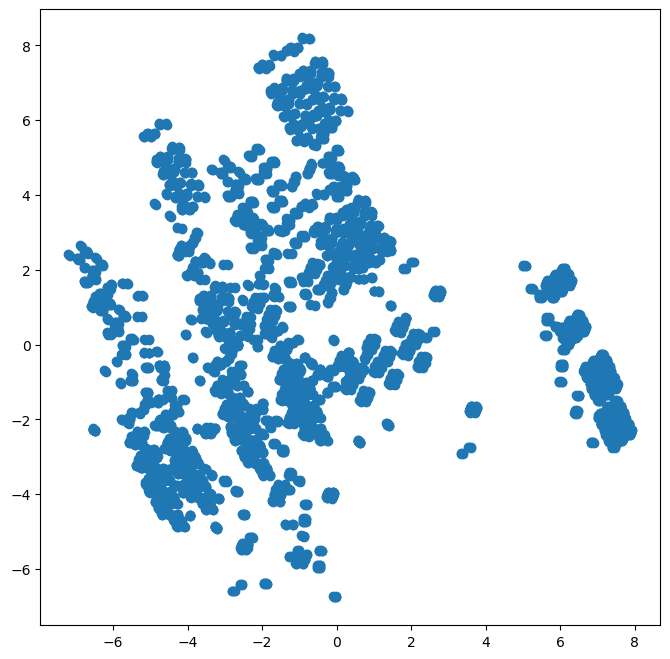

In [21]:
pca = PCA(n_components = 2)
x = pca.fit_transform(df.values)
plt.figure(figsize = (8, 8))
plt.scatter(x[:,0], x[:,1], cmap = "Blues")
plt.show()

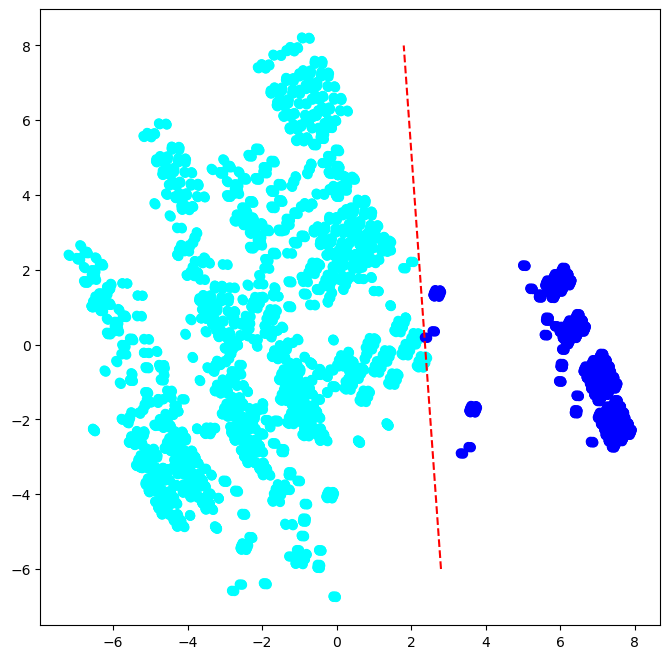

In [22]:
kmeans = KMeans(n_clusters=2, random_state=42)
X_cluster = kmeans.fit_predict(df.values)

colors = {0 : 'blue', 1 : 'cyan'}

label_color = [colors[i] for i in X_cluster]
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1], c = label_color, cmap = "Blues")
plt.plot([2.8, 1.8], [-6, 8], '--', color = "red")
plt.show()

<h4>Using k-means clustering we were able to visually seperate the poisonous and edible mushrooms</h4>

In [37]:
cap_shape = widgets.Dropdown(
    description = "cap-shape",   
    options = [('bell', '0'), ('conical', '1'), ('convex', '2'), ('flat', '3'), ('knobbed', '4'), ('sunken', '5')]
)

cap_surface = widgets.Dropdown(
    description = "cap-surface",    
    options = [('fibrous', '0'), ('grooves', '1'), ('scaly', '2'), ('smooth', '3')]
)

cap_color = widgets.Dropdown(
    description = "cap-color",    
    options = [('brown', '0'), ('buff', '1'), ('cinnamon', '2'), ('gray', '3'), ('green', '4'), ('pink', '5'), 
               ('purple', '6'), ('red', '7'), ('white', '8'), ('yellow', '9')]
)

bruises = widgets.Dropdown(
    description = "bruises",    
    options = [('bruises', '0'), ('no', '1')]
)

odor = widgets.Dropdown(
    description = "odor",    
    options = [('almond', '0'), ('anise', '1'), ('creosote', '2'), ('fishy', '3'), ('foul', '4'), ('musty', '5'), 
               ('none', '6'), ('pungent', '7'), ('spicy', '8')]
)

gill_attachment = widgets.Dropdown(
    description = "gill-attachment",    
    options = [('attached', '0'), ('descending', '1'), ('free', '2'), ('notched', '3')]
)

gill_spacing = widgets.Dropdown(
    description = "gill-spacing",    
    options = [('close', '0'), ('crowded', '1'), ('distant', '2')]
)

gill_size = widgets.Dropdown(
    description = "gill-size",    
    options = [('broad', '0'), ('narrow', '1')]
)

gill_color = widgets.Dropdown(
    description = "gill-color",    
    options = [('black', '0'), ('brown', '1'), ('buff', '2'), ('chocolate', '3'), ('gray', '4'), ('green', '5'), 
               ('orange', '6'), ('pink', '7'), ('purple', '8'), ('red', '9'), ('white', '10'), ('yellow', '11')]
)

stalk_shape = widgets.Dropdown(
    description = "stalk-shape",    
    options = [('enlarging', '0'), ('tapering', '1')]
)

stalk_root = widgets.Dropdown(
    description = "stalk-root",    
    options = [('bulbous', '0'), ('club', '1'), ('cup', '2'), ('equal', '3'), ('rhizomorphs', '4'), 
               ('rooted', '5'), ('missing', '6')]
)

stalk_surface_above_ring = widgets.Dropdown(
    description = "stalk-surface-above-ring",    
    options = [('fibrous', '0'), ('scaly', '1'), ('silky', '2'), ('smooth', '3')]
)

stalk_surface_below_ring = widgets.Dropdown(
    description = "stalk-surface-below-ring",    
    options = [('fibrous', '0'), ('scaly', '1'), ('silky', '2'), ('smooth', '3')]
)

stalk_color_above_ring = widgets.Dropdown(
    description = "stalk-color-above-ring",    
    options = [('brown', '0'), ('buff', '1'), ('cinnamon', '2'), ('gray', '3'), ('orange', '4'), ('pink', '5'), 
               ('red', '6'), ('white', '7'), ('yellow', '8')]
)

stalk_color_below_ring = widgets.Dropdown(
    description = "stalk-color-below-ring",    
    options = [('brown', '0'), ('buff', '1'), ('cinnamon', '2'), ('gray', '3'), ('orange', '4'), ('pink', '5'), 
               ('red', '6'), ('white', '7'), ('yellow', '8')]
)

veil_color = widgets.Dropdown(
    description = "veil_color",    
    options = [('brown', '0'), ('orange', '1'), ('white', '2'), ('yellow', '3')]
)

ring_number = widgets.Dropdown(
    description = "ring-number",    
    options = [('none', '0'), ('one', '1'), ('two', '2')]
)

ring_type = widgets.Dropdown(
    description = "ring-type",    
    options = [('cobwebby', '0'), ('evanescent', '`'), ('flaring', '1'), ('large', '2'), ('none', '3'), 
               ('pendant', '4'), ('sheathing', '5'), ('zone', '6')]
)

spore_print_color = widgets.Dropdown(
    description = "spore-print-color",    
    options = [('black', '0'), ('brown', '1'), ('buff', '2'), ('chocolate', '3'), ('green', '4'), ('orange', '5'), 
               ('purple', '6'), ('white', '7'), ('yellow', '8')]
)

population = widgets.Dropdown(
    description = "population",    
    options = [('abundant', '0'), ('clustered', '1'), ('numerous', '2'), ('scattered', '3'), ('several', '4'), 
               ('solitary', '5')]
)

habitat = widgets.Dropdown(
    description = "habitat",    
    options = [('grasses', '0'), ('leaves', '1'), ('meadows', '2'), ('paths', '3'), ('urban', '4'), 
               ('waste', '5'), ('woods', '6')]
)

widget_box = widgets.VBox([cap_shape, cap_surface, cap_color, bruises, odor, gill_attachment, gill_spacing, gill_size,
                           gill_color, stalk_shape, stalk_root, stalk_surface_above_ring, stalk_surface_below_ring,
                           stalk_color_above_ring, stalk_color_below_ring, veil_color, ring_number, ring_type, 
                           spore_print_color, population, habitat])

box_tuple = [widget_box]
tab = widgets.Tab()
tab.children = box_tuple

tab

<h5>
cap_shape = widgets.Dropdown(
    description = "cap-shape",   
    options = [('bell', 'b'), ('conical', 'c'), ('convex', 'x'), ('flat', 'f'), ('knobbed', 'k'), ('sunken', 's')]
)

cap_surface = widgets.Dropdown(
    description = "cap-surface",    
    options = [('fibrous', 'f'), ('grooves', 'g'), ('scaly', 'y'), ('smooth', 's')]
)

cap_color = widgets.Dropdown(
    description = "cap-color",    
    options = [('brown', 'n'), ('buff', 'b'), ('cinnamon', 'c'), ('gray', 'g'), ('green', 'r'), ('pink', 'p'), 
               ('purple', 'u'), ('red', 'e'), ('white', 'w'), ('yellow', 'y')]
)

bruises = widgets.Dropdown(
    description = "bruises",    
    options = [('bruises', 't'), ('no', 'f')]
)

odor = widgets.Dropdown(
    description = "odor",    
    options = [('almond', 'a'), ('anise', 'l'), ('creosote', 'c'), ('fishy', 'y'), ('foul', 'f'), ('musty', 'm'), 
               ('none', 'n'), ('pungent', 'p'), ('spicy', 's')]
)

gill_attachment = widgets.Dropdown(
    description = "gill-attachment",    
    options = [('attached', 'a'), ('descending', 'd'), ('free', 'f'), ('notched', 'n')]
)

gill_spacing = widgets.Dropdown(
    description = "gill-spacing",    
    options = [('close', 'c'), ('crowded', 'w'), ('distant', 'd')]
)

gill_size = widgets.Dropdown(
    description = "gill-size",    
    options = [('broad', 'b'), ('narrow', 'n')]
)

gill_color = widgets.Dropdown(
    description = "gill-color",    
    options = [('black', 'k'), ('brown', 'n'), ('buff', 'b'), ('chocolate', 'h'), ('gray', 'g'), ('green', 'r'), 
               ('orange', 'o'), ('pink', 'p'), ('purple', 'u'), ('red', 'e'), ('white', 'w'), ('yellow', 'y')]
)

stalk_shape = widgets.Dropdown(
    description = "stalk-shape",    
    options = [('enlarging', 'e'), ('tapering', 't')]
)

stalk_root = widgets.Dropdown(
    description = "stalk-root",    
    options = [('bulbous', 'b'), ('club', 'c'), ('cup', 'u'), ('equal', 'e'), ('rhizomorphs', 'z'), 
               ('rooted', 'r'), ('missing', '?')]
)

stalk_surface_above_ring = widgets.Dropdown(
    description = "stalk-surface-above-ring",    
    options = [('fibrous', 'f'), ('scaly', 's'), ('silky', 'k'), ('smooth', 's')]
)

stalk_surface_below_ring = widgets.Dropdown(
    description = "stalk-surface-below-ring",    
    options = [('fibrous', 'f'), ('scaly', 's'), ('silky', 'k'), ('smooth', 's')]
)

stalk_color_above_ring = widgets.Dropdown(
    description = "stalk-color-above-ring",    
    options = [('brown', 'n'), ('buff', 'b'), ('cinnamon', 'c'), ('gray', 'g'), ('orange', 'o'), ('pink', 'p'), 
               ('red', 'e'), ('white', 'w'), ('yellow', 'y')]
)

stalk_color_below_ring = widgets.Dropdown(
    description = "stalk-color-below-ring",    
    options = [('brown', 'n'), ('buff', 'b'), ('cinnamon', 'c'), ('gray', 'g'), ('orange', 'o'), ('pink', 'p'), 
               ('red', 'e'), ('white', 'w'), ('yellow', 'y')]
)

veil_color = widgets.Dropdown(
    description = "veil_color",    
    options = [('brown', 'n'), ('orange', 'o'), ('white', 'w'), ('yellow', 'y')]
)

ring_number = widgets.Dropdown(
    description = "ring-number",    
    options = [('none', 'n'), ('one', 'o'), ('two', 't')]
)

ring_type = widgets.Dropdown(
    description = "ring-type",    
    options = [('cobwebby', 'c'), ('evanescent', 'e'), ('flaring', 'f'), ('large', 'l'), ('none', 'n'), 
               ('pendant', 'p'), ('sheathing', 's'), ('zone', 'z')]
)

spore_print_color = widgets.Dropdown(
    description = "spore-print-color",    
    options = [('black', 'k'), ('brown', 'n'), ('buff', 'b'), ('chocolate', 'h'), ('green', 'r'), ('orange', 'o'), 
               ('purple', 'u'), ('white', 'w'), ('yellow', 'y')]
)

population = widgets.Dropdown(
    description = "population",    
    options = [('abundant', 'a'), ('clustered', 'c'), ('numerous', 'n'), ('scattered', 's'), ('several', 'v'), 
               ('solitary', 'y')]
)

habitat = widgets.Dropdown(
    description = "habitat",    
    options = [('grasses', 'g'), ('leaves', 'l'), ('meadows', 'm'), ('paths', 'p'), ('urban', 'u'), 
               ('waste', 'w'), ('woods', 'd')]
)
</h5>

In [36]:
def on_button_clicked(_):    
    mushroom = [{'cap_shape': cap_shape.value, 
                  'cap_surface': cap_surface.value, 
                  'cap_color': cap_color.value, 
                  'bruises': bruises.value, 
                  'odor': odor.value,
                  'gill_attachment': gill_attachment.value, 
                  'gill_spacing': gill_spacing.value, 
                  'gill_size': gill_size.value, 
                  'gill_color': gill_color.value, 
                  'stalk_shape': stalk_shape.value, 
                  'stalk_root': stalk_root.value, 
                  'stalk_surface_above_ring': stalk_surface_above_ring.value, 
                  'stalk_surface_below_ring': stalk_surface_below_ring.value,
                  'stalk_color_above_ring': stalk_color_above_ring.value, 
                  'stalk_color_below_ring': stalk_color_below_ring.value, 
                  'veil_color': veil_color.value,
                  'ring_number': ring_number.value,
                  'ring_type': ring_type.value, 
                  'spore_print_color': spore_print_color.value, 
                  'population': population.value, 
                  'habitat': habitat.value}]
    
    mushroom = pd.DataFrame(mushroom)
    print(mushroom)
    with out:
        out.clear_output()
        prediction = model.predict(mushroom)
        print(prediction)
    return

# calculate_prediction execution button harvest input from sliders
calc_button = widgets.Button(description='Calculate')
out = widgets.Output()

# Link button and function together using button method
calc_button.on_click(on_button_clicked)
# Display button and output together
widgets.VBox([calc_button, out])

  cap_shape cap_surface cap_color bruises odor gill_attachment gill_spacing  \
0         2           0         3       0    0               2            0   

  gill_size gill_color stalk_shape stalk_root stalk_surface_above_ring  \
0         1          0           1          0                        0   

  stalk_surface_below_ring stalk_color_above_ring stalk_color_below_ring  \
0                        2                      y                      5   

  veil_color ring_number ring_type spore_print_color population habitat  
0          1           1         5                 2          2       4  
  cap_shape cap_surface cap_color bruises odor gill_attachment gill_spacing  \
0         2           3         0       0    7               2            0   

  gill_size gill_color stalk_shape stalk_root stalk_surface_above_ring  \
0         1          0           0          3                        3   

  stalk_surface_below_ring stalk_color_above_ring stalk_color_below_ring  \
0      